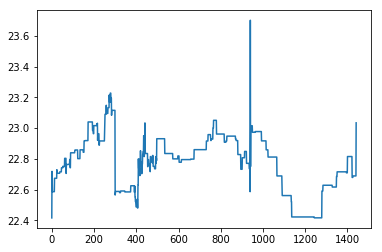

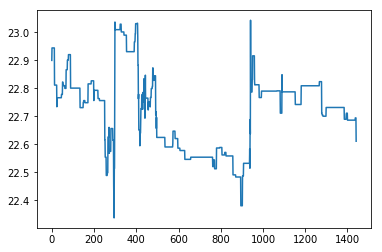

D5M1 ['1', '0']
D5M2 ['1', '1.00E-07']
D5M3 ['1', '2.00E-07']
D5M4 ['1', '3.00E-07']
D5M5 ['1', '4.00E-07']
D5M6 ['1', '5.00E-07']
D5M7 ['1', '6.00E-07']
D5M8 ['1', '7.00E-07']
D5M9 ['1', '8.00E-07']
D5M10 ['1', '9.00E-07']
D5M11 ['1', '1.00E-06']
D5M1 {'MM': {'n': 32, 'mean': 22.4156249996875, 'stdev': 2.4656490842833425, 'values': [23.16666667, 24.16666667, 24.33333333, 21.0, 24.5, 23.0, 25.66666667, 21.33333333, 19.66666667, 20.5, 28.0, 19.5, 20.33333333, 23.8, 26.5, 27.0, 24.16666667, 20.33333333, 24.5, 20.33333333, 24.66666667, 20.5, 20.5, 22.33333333, 22.5, 21.0, 18.0, 22.5, 21.33333333, 22.83333333, 18.83333333, 20.5]}, 'TT': {'n': 21, 'mean': 22.9, 'stdev': 2.020588473000433, 'values': [22.83333333, 22.16666667, 24.33333333, 19.66666667, 23.66666667, 21.33333333, 24.66666667, 25.33333333, 22.83333333, 19.5, 21.4, 22.0, 19.83333333, 20.66666667, 25.66666667, 23.0, 23.0, 23.0, 24.16666667, 25.83333333, 26.0]}, 'MT': {'n': 17, 'mean': 22.90784313647059, 'stdev': 1.6452595802308836

In [46]:
import csv
import re
import statistics
import matplotlib.pyplot as plt
"""
ERRORS TO CHECK FOR

duplicate line names (will just be rewritten write now)
check to make sure line and average are correct column names
"""

"""
Input variables
    Phenotype file name and location
    Genotype file name and location
    Allele 1
    Allele 2
    Allele Error
"""

genotype_filename = "C:/Users/craig/CSB/Final_Project/csb_final_project/DataSet1.csv"
phenotype_filename = "C:/Users/craig/CSB/Final_Project/csb_final_project/GenotypeSet1.csv"
allele1 = "M"
allele2 = "T"
allele_bad = "N"

homo1 = allele1 + allele1
homo2 = allele2 + allele2
hetero1 = allele1 + allele2
hetero2 = allele2 + allele1

possible_genotypes = (homo1, homo2, hetero1)

data = {}
with open(genotype_filename) as gf:
    reader = csv.DictReader(gf)
    for i, entry in enumerate(gf):
        if i is 0:
            is_first_col = re.split(r",", entry)[0].lower() == "line"
            is_second_col = re.findall(r"(.*)\n?", re.split(r",", entry)[-1])[0].lower() == "average"
        elif i is not 0:
            temp_line = re.split(r",", entry)[0]
            temp_average = re.findall(r"(.*)\n?", re.split(r",", entry)[-1])[0]
            data[temp_line] = temp_average
    gf.close()

list_loci_info = []
loci_data = {}
genotypes = {}
with open(phenotype_filename) as pf:
    reader = csv.DictReader(pf)
    for i, entry in enumerate(pf):
        values = re.split(r",", re.findall(r"(.+)\n?", entry)[0])
        if i < 3:
            for i, value in enumerate(values):
                if i is not 0:
                    temp_loci_data = {}
                    for genotype in possible_genotypes:
                        temp_loci_data[genotype] = {'n': 0, 'mean': 0, 'stdev': 0, 'values': []}
                    try:
                        list_loci_info[i - 1].append(value)
                    except IndexError:
                        list_loci_info.append([])
                        list_loci_info[i - 1].append(value)
                        loci_data[value] = temp_loci_data
        else:
            line = values.pop(0)
            genotypes[line] = {}
            for i, value in enumerate(values):
                genotypes[line][list_loci_info[i][0]] = value
    pf.close()

loci_info = {}
for loci in list_loci_info:
    loci_info[loci[0]] = loci[1:]

for loci in loci_data:
    for line in genotypes:
        genotype = genotypes[line][loci]
        if genotype == hetero2:
            genotype = hetero1
        if genotype != allele_bad:
            loci_data[loci][genotype]['values'].append(float(data[line]))

for loci in loci_data:
    for genotype in possible_genotypes:
        count = len(loci_data[loci][genotype]['values'])
        loci_data[loci][genotype]['n'] = count
        if count < 1:
            loci_data[loci][genotype]['mean'] = 0
            loci_data[loci][genotype]['stdev'] = 0
        else: 
            loci_data[loci][genotype]['mean'] = statistics.mean(loci_data[loci][genotype]['values'])
            if count == 1:
                loci_data[loci][genotype]['stdev'] = 0
            else:
                loci_data[loci][genotype]['stdev'] = statistics.stdev(loci_data[loci][genotype]['values'])
newlist = []
for j in possible_genotypes:
    temp = []
    for i in loci_data:
        temp.append(loci_data[i][j]['mean'])
    newlist.append(temp)

for i in newlist:
    plt.plot(i)
    plt.show()

count = 0
for i in loci_info:
    if count > 10:
        break
    print(i, loci_info[i])
    count = count + 1
    
count = 10
for i in loci_data:
    if count > 10:
        break
    print(i, loci_data[i])
    count = count + 1

count = 10
for i in genotypes:
    if count > 10:
        break
    print(i, genotypes[i])
    count = count + 1

count = 0
for i in data:
    if count > 10:
        break
    print(i, data[i])
    count = count + 1


In [42]:
def simpleANOVA(data):
    import scipy.stats
    
    total_average = 0
    total_n = 0
    group_averages = []
    group_n = []
    
    for i in data:
        temp_average = 0
        temp_n = 0
        for j in i:
            total_average = total_average + j
            total_n = total_n + 1
            temp_average = temp_average + j
            temp_n = temp_n + 1
        if temp_n > 0:
            temp_average = temp_average / temp_n
            group_averages.append(temp_average)
            group_n.append(temp_n)
        else:
            group_averages.append(0)
            group_n.append(0)
    
    total_average = total_average / total_n
    
    SST = 0
    for i in data:
        for j in i:
            SST = SST + (j - total_average) ** 2
            
    SSB = 0
    for i, j in enumerate(data):
        mean = group_averages[i]
        n = len(j)
        SSB = SSB + n * (mean - total_average) ** 2
    
    SSE = SST - SSB
    dfSSB = len(data) - 1
    dfSSE = total_n - len(data)
    MSB = SSB / dfSSB
    MSE = SSE / dfSSE
    if MSE == 0:
        return {"F": float('inf'), "p": 0}
    
    F = MSB / MSE
    p = scipy.stats.f.sf(F, dfSSB, dfSSE)
    
    return {"F": F, "p": p}

In [14]:
%pdb

Automatic pdb calling has been turned ON


In [8]:
import scipy.stats
a = [643, 655, 702]
c = [484, 456, 402, 469, 427, 525]
d = [a, c]
p = scipy.stats.f_oneway(a, c)
print(p[1])

p = scipy.stats.f.sf(62.03928, 1, 109)
print(p)

0.000168665730895
3.51951097805e-05


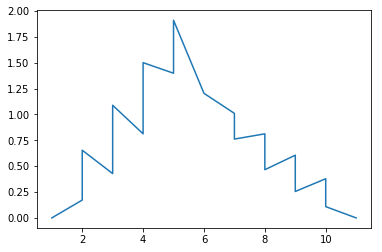

In [32]:
import matplotlib.pyplot as plt
import scipy.stats
import math
Fy = [0, 0.18, 1.51, 0.80, 3.09, 2.06, 4.74, 4.32, 6.48, 3.54, 3.54, 2.79, 1.88, 2.06, 0.91, 1.35, 0.35, 0.66, 0.08, 0]
py =[]
px = [1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11]
for i in Fy:
    py.append(-math.log10(scipy.stats.f.sf(i, 1, 108)))

plt.plot(px, py)
plt.show()

In [22]:
import statistics
import scipy.stats
import math
import matplotlib.pyplot as plt
from numpy import asarray
from statsmodels.stats.multicomp import pairwise_tukeyhsd as TukeyHSD

alpha = 0.5

loci_data = {}
loci_data['1'] = {'M': {}, 'T': {}}
loci_data['1']['M'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9, 9, 9, 9, 9, 9]}
loci_data['1']['T'] = {'n': 0, 'mean': 0, 'values': []}

loci_data['2'] = {'M': {}, 'T': {}}
loci_data['2']['M'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 9, 9, 9, 9, 9, 9]}
loci_data['2']['T'] = {'n': 0, 'mean': 0, 'values': [2]}

loci_data['3'] = {'M': {}, 'T': {}}
loci_data['3']['M'] = {'n': 0, 'mean': 0, 'values': [2, 2, 9, 9, 9, 9, 9, 9]}
loci_data['3']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2]}

loci_data['4'] = {'M': {}, 'T': {}}
loci_data['4']['M'] = {'n': 0, 'mean': 0, 'values': [2, 9, 9, 9, 9, 9, 9]}
loci_data['4']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2]}

loci_data['5'] = {'M': {}, 'T': {}}
loci_data['5']['M'] = {'n': 0, 'mean': 0, 'values': [9, 9, 9, 9, 9, 9]}
loci_data['5']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2]}

loci_data['6'] = {'M': {}, 'T': {}}
loci_data['6']['M'] = {'n': 0, 'mean': 0, 'values': [9, 9, 9, 9, 9]}
loci_data['6']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9]}

loci_data['7'] = {'M': {}, 'T': {}}
loci_data['7']['M'] = {'n': 0, 'mean': 0, 'values': [9, 9, 9, 9]}
loci_data['7']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9, 9]}

loci_data['8'] = {'M': {}, 'T': {}}
loci_data['8']['M'] = {'n': 0, 'mean': 0, 'values': [9, 9, 9]}
loci_data['8']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9, 9, 9]}

loci_data['9'] = {'M': {}, 'T': {}}
loci_data['9']['M'] = {'n': 0, 'mean': 0, 'values': [9, 9]}
loci_data['9']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9, 9, 9, 9]}

loci_data['10'] = {'M': {}, 'T': {}}
loci_data['10']['M'] = {'n': 0, 'mean': 0, 'values': [9]}
loci_data['10']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9, 9, 9, 9, 9]}

loci_data['11'] = {'M': {}, 'T': {}}
loci_data['11']['M'] = {'n': 0, 'mean': 0, 'values': []}
loci_data['11']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9, 9, 9, 9, 9, 9]}


groupsANOVA = {}
for i in loci_data:
    for j in loci_data[i]:
        groupsANOVA[i + j] = loci_data[i][j]

data = []
for i in groupsANOVA:
    data.append(groupsANOVA[i]['values'])

print(simpleANOVA(data))

total_n = 0
total_average = 0
group_n = 0
for i in loci_data:
    for j in loci_data[i]:
        n = len(loci_data[i][j]['values'])
        loci_data[i][j]['n'] = n
        total_n = total_n + n
        if n > 0:
            group_n = group_n + 1
            mean = sum(loci_data[i][j]['values']) / n
            loci_data[i][j]['mean'] = mean
            total_average = total_average + mean * n
            groupsANOVA[i + j] = loci_data[i][j]
total_average = total_average / total_n

SST = 0
for i in groupsANOVA:
    for j in groupsANOVA[i]['values']:
        SST = SST + (j - total_average) ** 2

SSB = 0
for i in groupsANOVA:
    mean = groupsANOVA[i]['mean']
    n = groupsANOVA[i]['n']
    SSB = SSB + n * (mean - total_average) ** 2

SSE = SST - SSB
dfSSB = group_n - 1
dfSSE = total_n - group_n
MSB = SSB / dfSSB
MSE = SSE / dfSSE
F = MSB / MSE
p = scipy.stats.f.sf(F, dfSSB, dfSSE)

print("F-value:", F, "\np-value:", p)

means = []
for i in loci_data:
    for j in loci_data[i]:
        means.append(loci_data[i][j]['mean'])

if p > alpha:
    1#1/0
    ####THIS NEEDS TO BE CHANGED####
pvalues = {}
for i in groupsANOVA:
    current_values = groupsANOVA[i]['values']
    outgroup_values = []
    for j in groupsANOVA:
        if i != j:
            for k in groupsANOVA[j]['values']:
                outgroup_values.append(k)
    if len(current_values) > 1:
        current_p = scipy.stats.ttest_ind(asarray(current_values),
                                          asarray(outgroup_values))
        pvalues[i] = current_p[1]

data = []
groupsTukeyHSD = []
for i in groupsANOVA:
    for j in groupsANOVA[i]['values']:
        data.append(j)
        groupsTukeyHSD.append(i)

tukey = TukeyHSD(data, groupsTukeyHSD, alpha)

"""
for i in groupsANOVA:
    for k, j in enumerate(groupsANOVA[i]):
        if k == 0:
            print(i + "\t" + j + ": ", groupsANOVA[i][j])
        else:
            print("\t" + j + ": ", groupsANOVA[i][j])
    print("\n")
"""
"""
q = tukey.q_crit
sig_dif = {}
for i in range(len(tukey.summary())):
    if str(tukey.summary()[i][-1]) == "True":
        float(str(tukey.summary()[i][2])) / q
        sig_dif[str(tukey.summary()[i][0]) + 
                str(tukey.summary()[i][1])] = 1
    """
summary = []
for i in range(len(tukey.summary())):
    summary.append([])
    for j in range(len(tukey.summary()[i])):
        value = str(tukey.summary()[i][j])
        try:
            value = float(value)
        except ValueError:
            if value == "False":
                value = False
            elif value == "True":
                value = True
        summary[i].append(value)


crit = []
critdata = []
critgroups = []
for i in summary:
    if i[-1] == True:
        crit.append(i)
    else:
        i.append(1)

toadd = True
for i in crit:
    for j in [0, 1]:
        for k in critdata:
            if i[j] == k:
                toadd = False
                break
        if toadd:
            critgroups.append(i[j])
            critdata.append(loci_data[i[j][0]][i[j][1:]]['mean'])

alpha = alpha - 0.1

print(critgroups, critdata)


{'F': 2.2313426614541525, 'p': 0.0050049948707732595}
F-value: 2.522271309897338 
p-value: 0.00185403888368
['3M', '5T', '3T', '5M', '3T', '6M', '3T', '7M', '4M', '4T', '4M', '5T', '4T', '5M', '4T', '6M', '4T', '7M', '4T', '8M', '5M', '5T', '5M', '6T', '5M', '7T', '5T', '6M', '5T', '7M', '5T', '8M', '5T', '9M', '6M', '6T', '6T', '7M'] [7.25, 2.0, 2.0, 9.0, 2.0, 9.0, 2.0, 9.0, 8.0, 2.0, 8.0, 2.0, 2.0, 9.0, 2.0, 9.0, 2.0, 9.0, 2.0, 9.0, 9.0, 2.0, 9.0, 3.4, 9.0, 4.333333333333333, 2.0, 9.0, 2.0, 9.0, 2.0, 9.0, 2.0, 9.0, 9.0, 3.4, 3.4, 9.0]


In [82]:
list_l

Automatic pdb calling has been turned ON


In [18]:
data = []
for i in groupsANOVA:
    data.append(groupsANOVA[i]['values'])
data

[[2, 2, 2, 2, 9, 9, 9, 9, 9, 9],
 [2, 2, 2, 9, 9, 9, 9, 9, 9],
 [2],
 [2, 2, 9, 9, 9, 9, 9, 9],
 [2, 2],
 [2, 9, 9, 9, 9, 9, 9],
 [2, 2, 2],
 [9, 9, 9, 9, 9, 9],
 [2, 2, 2, 2],
 [9, 9, 9, 9, 9],
 [2, 2, 2, 2, 9],
 [9, 9, 9, 9],
 [2, 2, 2, 2, 9, 9],
 [9, 9, 9],
 [2, 2, 2, 2, 9, 9, 9],
 [9, 9],
 [2, 2, 2, 2, 9, 9, 9, 9],
 [9],
 [2, 2, 2, 2, 9, 9, 9, 9, 9],
 [2, 2, 2, 2, 9, 9, 9, 9, 9, 9]]

In [6]:
import ggplot

In [15]:
g = []
p = []
import math
import re
for i in pvalues:
    g.append(int(re.findall(r'\d+', i)[0]))
    p.append(-math.log10(pvalues[i]))

abc = {'g': g, 'p': p}
import pandas
df = pandas.DataFrame(abc)

g         p
0    1 -0.000000
1    2  0.171666
2    3  0.428195
3    3  1.087157
4    4  0.812414
5    4  1.500037
6    5  1.397544
7    5  1.909363
8    6  1.203688
9    6  1.203688
10   7  1.009118
11   7  0.761017
12   8  0.811400
13   8  0.464421
14   9  0.605830
15   9  0.257238
16  10  0.108556
17  11 -0.000000

C:\Users\craig\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\craig\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\craig\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


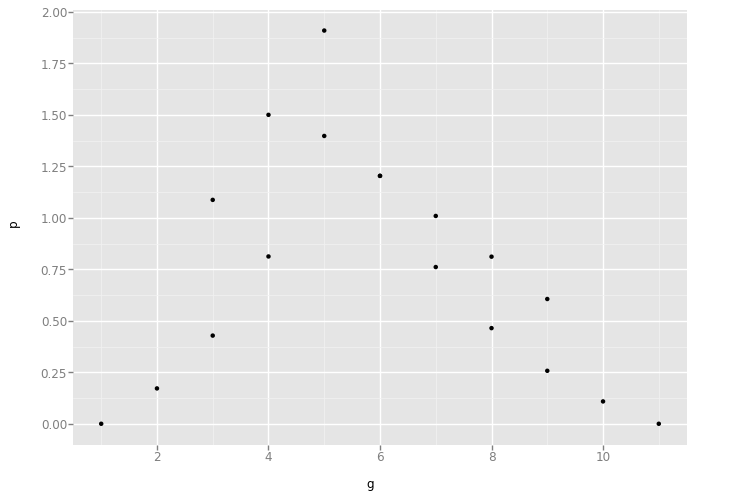

<ggplot: (-9223371932034663287)>

In [16]:
from ggplot import *
ggplot(df, aes('g', 'p')) +\
    geom_point()

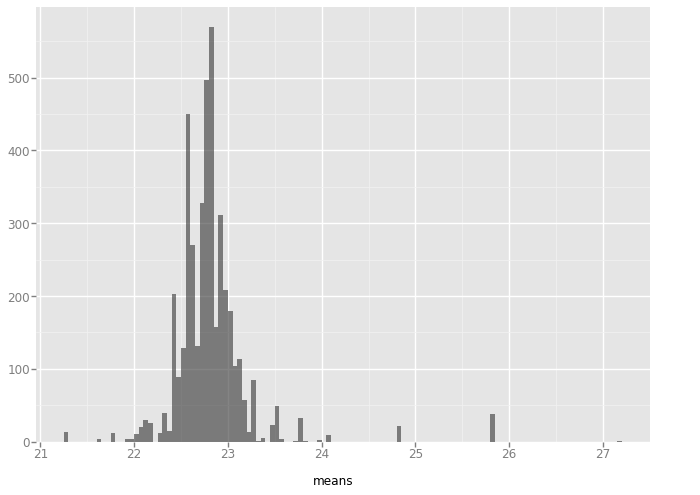

<ggplot: (-9223371875158761363)>

In [62]:
import pandas as pd
import numpy as np


ggplot(aes(x='means'), data=df) + \
    geom_histogram(alpha=0.6, binwidth= .05)

In [77]:
from scipy import stats
np.random.seed(12345678)

rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
stats.ttest_ind(rvs1,rvs2)
stats.ttest_ind(rvs1,rvs2, equal_var = False)



Ttest_indResult(statistic=0.26833823296238857, pvalue=0.78849452749501059)

In [11]:
import re
a = '11t'
int(re.findall(r'\d+', a)[0])


11

In [4]:
re.

None


In [47]:
import statistics
import scipy.stats
import math
import matplotlib.pyplot as plt
import numpy
import pandas
from ggplot import *
from statsmodels.stats.multicomp import pairwise_tukeyhsd as TukeyHSD

alpha = 0.5

loci_data = {}
loci_data['1'] = {'M': {}, 'T': {}}
loci_data['1']['M'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9, 9, 9, 9, 9, 9]}
loci_data['1']['T'] = {'n': 0, 'mean': 0, 'values': []}

loci_data['2'] = {'M': {}, 'T': {}}
loci_data['2']['M'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 9, 9, 9, 9, 9, 9]}
loci_data['2']['T'] = {'n': 0, 'mean': 0, 'values': [2]}

loci_data['3'] = {'M': {}, 'T': {}}
loci_data['3']['M'] = {'n': 0, 'mean': 0, 'values': [2, 2, 9, 9, 9, 9, 9, 9]}
loci_data['3']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2]}

loci_data['4'] = {'M': {}, 'T': {}}
loci_data['4']['M'] = {'n': 0, 'mean': 0, 'values': [2, 9, 9, 9, 9, 9, 9]}
loci_data['4']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2]}

loci_data['5'] = {'M': {}, 'T': {}}
loci_data['5']['M'] = {'n': 0, 'mean': 0, 'values': [9, 9, 9, 9, 9, 9]}
loci_data['5']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2]}

loci_data['6'] = {'M': {}, 'T': {}}
loci_data['6']['M'] = {'n': 0, 'mean': 0, 'values': [9, 9, 9, 9, 9]}
loci_data['6']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9]}

loci_data['7'] = {'M': {}, 'T': {}}
loci_data['7']['M'] = {'n': 0, 'mean': 0, 'values': [9, 9, 9, 9]}
loci_data['7']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9, 9]}

loci_data['8'] = {'M': {}, 'T': {}}
loci_data['8']['M'] = {'n': 0, 'mean': 0, 'values': [9, 9, 9]}
loci_data['8']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9, 9, 9]}

loci_data['9'] = {'M': {}, 'T': {}}
loci_data['9']['M'] = {'n': 0, 'mean': 0, 'values': [9, 9]}
loci_data['9']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9, 9, 9, 9]}

loci_data['10'] = {'M': {}, 'T': {}}
loci_data['10']['M'] = {'n': 0, 'mean': 0, 'values': [9]}
loci_data['10']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9, 9, 9, 9, 9]}

loci_data['11'] = {'M': {}, 'T': {}}
loci_data['11']['M'] = {'n': 0, 'mean': 0, 'values': []}
loci_data['11']['T'] = {'n': 0, 'mean': 0, 'values': [2, 2, 2, 2, 9, 9, 9, 9, 9, 9]}


groupsANOVA = {}
for i in loci_data:
    for j in loci_data[i]:
        groupsANOVA[i + j] = loci_data[i][j]

pvalues3 = {}
for i in groupsANOVA:
    current = groupsANOVA[i]['values']
    outgroup = []
    for j in groupsANOVA:
        if i != j:
            for k in groupsANOVA[j]['values']:
                outgroup.append(k)
    
    current_sample_means = []
    outgroup_sample_means = []
    bootstrap_count = 10
    for k in range(bootstrap_count):
        if len(current) > 1:
            current_sample = []
            outgroup_sample = []
            
            indices = numpy.random.randint(len(current), size = 10)
            for k in indices:
                current_sample.append(current[k])
            indices = numpy.random.randint(len(outgroup), size = 10)
            for k in indices:
                outgroup_sample.append(outgroup[k])
            
            current_sample_means.append(statistics.mean(current_sample))
            outgroup_sample_means.append(statistics.mean(outgroup_sample))
    if len(current_sample_means) == bootstrap_count:
        if len(outgroup_sample_means) == bootstrap_count:
            current_p = scipy.stats.ttest_ind(numpy.asarray(current_sample_means),
                                              numpy.asarray(outgroup_sample_means))[1]
            pvalues3[i] = current_p

location = []
p = []
for i in pvalues3:
    location.append(i)
    p.append(-math.log10(pvalues3[i]))

d = {'location': location, "-log(p)": p}
df = pandas.DataFrame(d)
    
ggplot(df, aes('location', '-log(p)')) +\
    geom_point()

<ggplot: (129536247023)>

In [41]:
%pdb

Automatic pdb calling has been turned OFF


In [13]:
current_sample

[2, 9, 2, 2, 9, 9, 9, 2, 2, 9]

In [15]:
outgroup_sample

[2, 9, 2, 9, 2, 9, 2, 9, 9, 9]